In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
# IMPORT ANNDATA OBJECT
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
# sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
# anndata = sdata.table
name_anndata = "anndataNucA11"
short_name = "A11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) 

In [3]:
# GENERATE UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

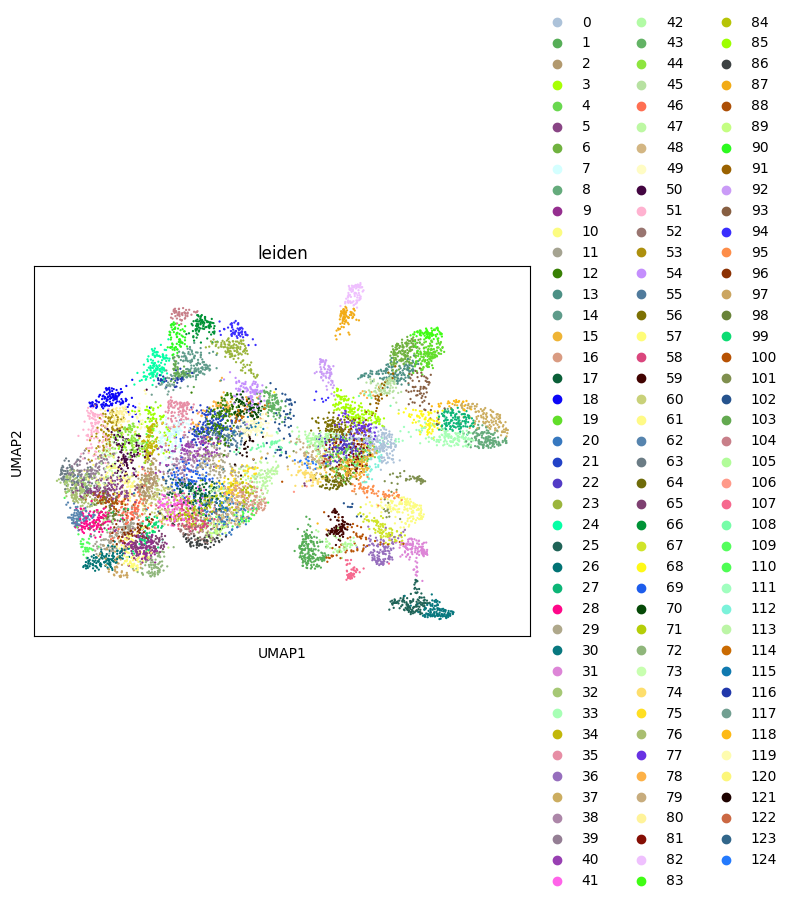

In [4]:
# LEIDEN OVERCLUSTERING
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

In [5]:
# PART 1
# Apply the original and new score genes functions based on a list of marker genes

Hepa            10
LSEC            11
Portal vein      5
Central vein     7
Chol             7
Kupf            16
Stel            16
Fibr            16
B cell           4
Meso             5
Portal LAM      12
Oth im           6
dtype: int64


Hepa   LSEC  Portal vein  Central vein   Chol   Kupf   Stel  \
Hepa          1.000  0.000        0.000         0.000  0.133  0.000  0.040   
LSEC          0.000  1.000        0.143         0.286  0.000  0.038  0.000   
Portal vein   0.000  0.143        1.000         0.333  0.091  0.000  0.000   
Central vein  0.000  0.286        0.333         1.000  0.077  0.000  0.045   
Chol          0.133  0.000        0.091         0.077  1.000  0.000  0.045   
Kupf          0.000  0.038        0.000         0.000  0.000  1.000  0.000   
Stel          0.040  0.000        0.000         0.045  0.045  0.000  1.000   
Fibr          0.040  0.000        0.000         0.000  0.045  0.000  0.455   
B cell        0.000  0.000        0.000         0.000  0.000  0.000  0.000   
Meso          0.000  0.000        0.000         0.000  0.091  0.000  0.000   
Portal LAM    0.000  0.045        0.062         0.056  0.118  0.273  0.000   
Oth im        0.000  0.000        0.100         0.083  0.083  0.000  0.000   

               Fibr  B cell   Meso  Portal LAM  Oth im  
Hepa          0.040   0.000  0.000       0.000   0.000  
LSEC          0.000   0.000  0.000       0.045   0.000  
Portal vein   0.000   0.000  0.000       0.062   0.100  
Central vein  0.000   0.000  0.000       0.056   0.083  
Chol          0.045   0.000  0.091       0.118   0.083  
Kupf          0.000   0.000  0.000       0.273   0.000  
Stel          0.455   0.000  0.000       0.000   0.000  
Fibr          1.000   0.000  0.050       0.000   0.000  
B cell        0.000   1.000  0.000       0.000   0.111  
Meso          0.050   0.000  1.000       0.000   0.000  
Portal LAM    0.000   0.000  0.000       1.000   0.125  
Oth im        0.000   0.111  0.000       0.125   1.000

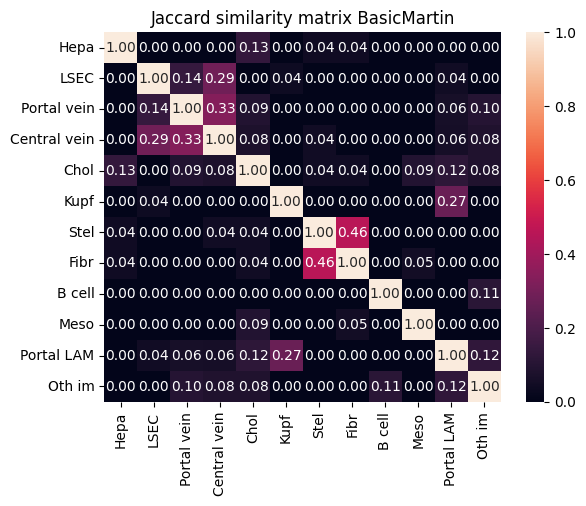

In [6]:
# IMPORT MARKER GENES
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
Jaccard_similarity_matrix(path_mg_BasicMartin,'BasicMartin')

In [7]:
# ORIGINAL SCORE GENES
#mg_dict, scoresper_cluster = score_genes_bins(
#    anndata,
#    path_marker_genes = path_mg_BasicMartin,
#    bins = 25,
#    suffix = '_BasicMartin'
#    )

In [8]:
# NEW SCORE GENES
scores = own_score_genes_iterative(anndata,path_mg_BasicMartin,nr_iterations=8,suffix='_BasicMartin')

In [9]:
anndata.uns.keys()

dict_keys(['annotation_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatialdata_attrs', 'umap', 'umap_15', 'own_score_genes_BasicMartin', 'own_score_genes_start_iterative_BasicMartin'])

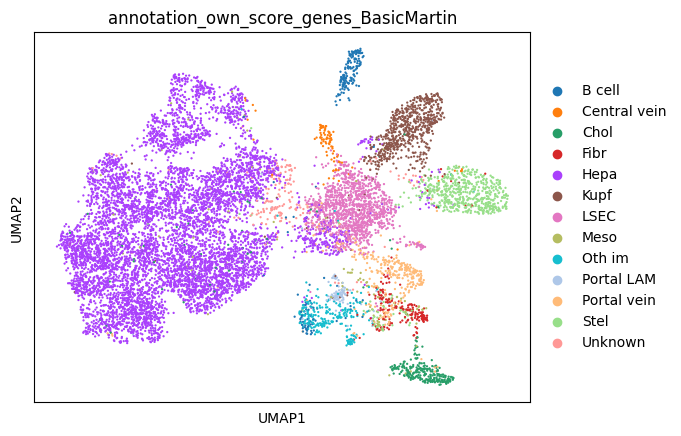

Cell type proportions:
              annotation_own_score_genes_BasicMartin
B cell                                      1.976425
Central vein                                0.850838
Chol                                        2.587964
Fibr                                        1.657361
Hepa                                       62.297261
Kupf                                        5.840645
LSEC                                       10.901356
Meso                                        0.912878
Oth im                                      2.135957
Portal LAM                                  0.833112
Portal vein                                 2.738633
Stel                                        5.627936
Unknown                                     1.639635


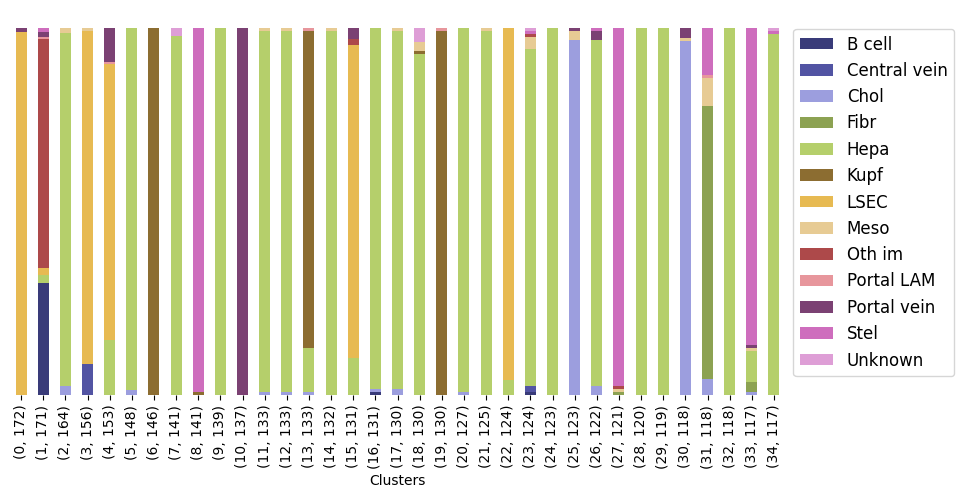

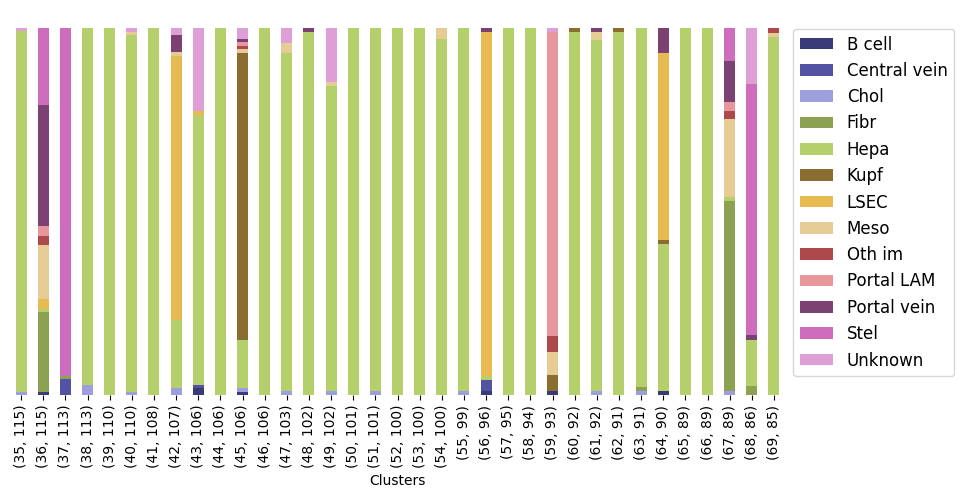

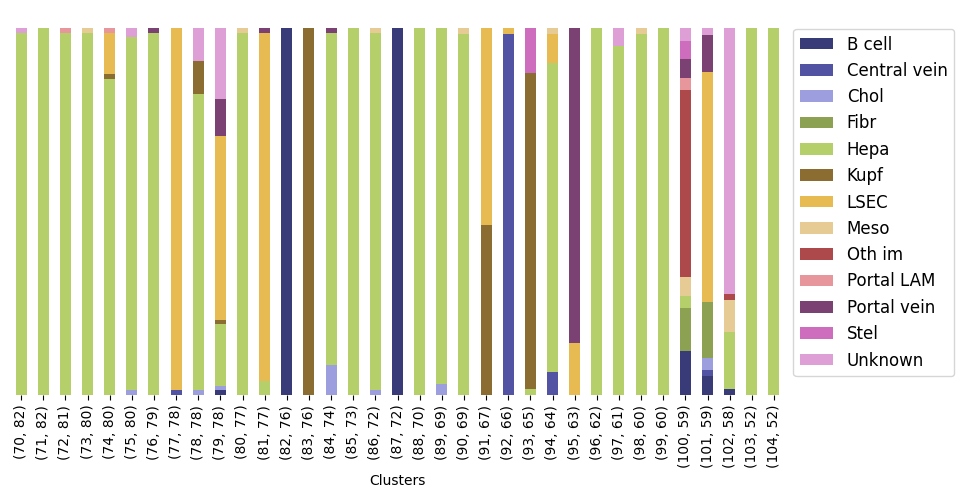

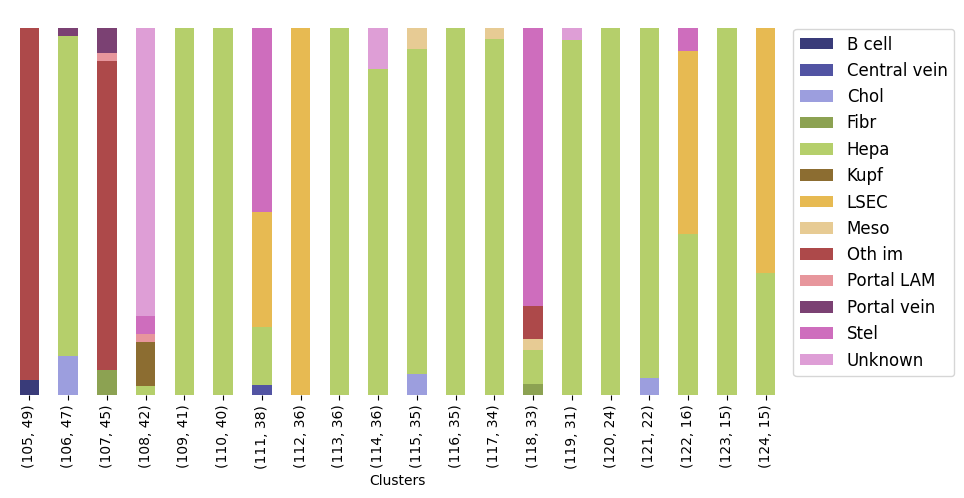

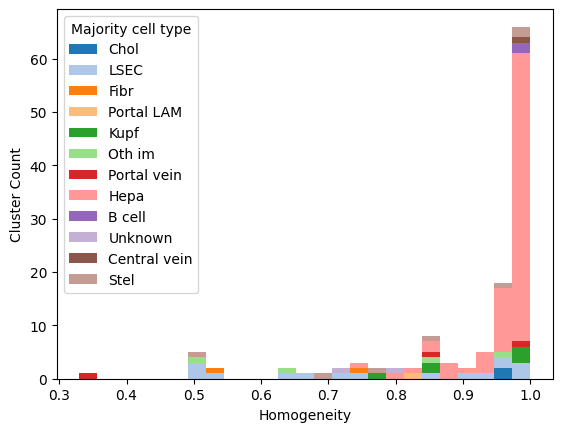

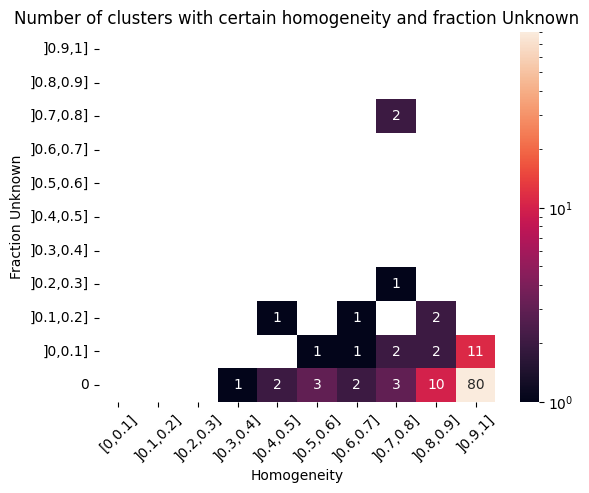

Average cluster homogeneity:
0.91


Correlation between cell type scores:


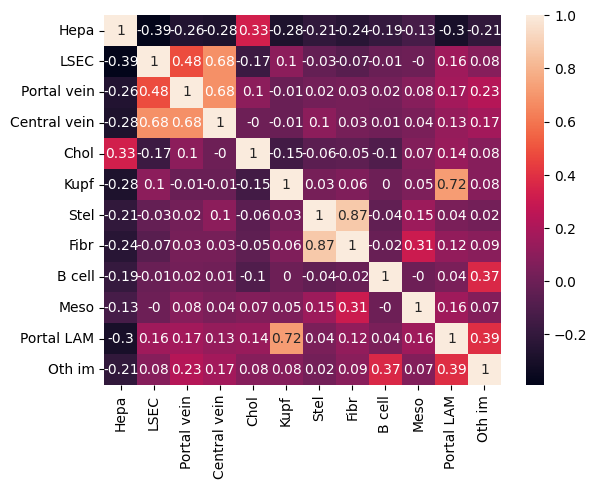

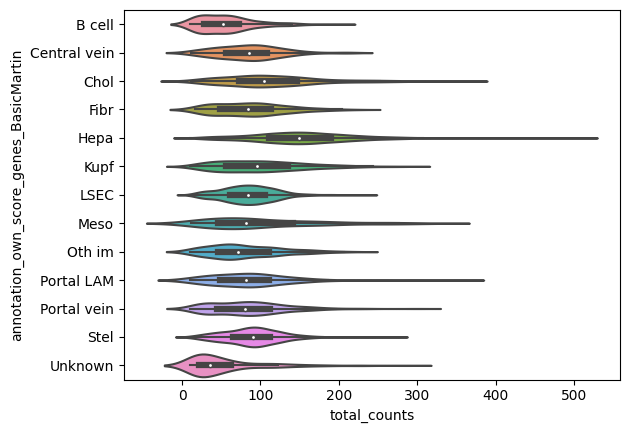

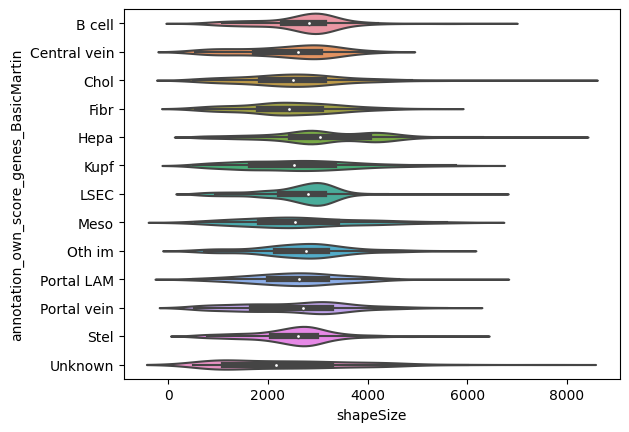

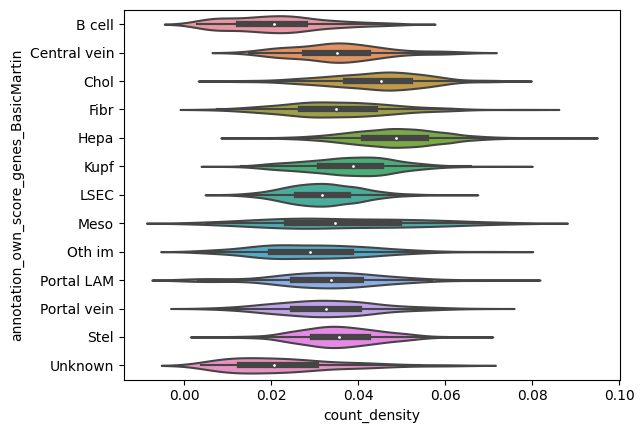

categories: B cell, Central vein, Chol, etc.
var_group_labels: hepa, hepa_chol_stel_fibr, hepa, etc.


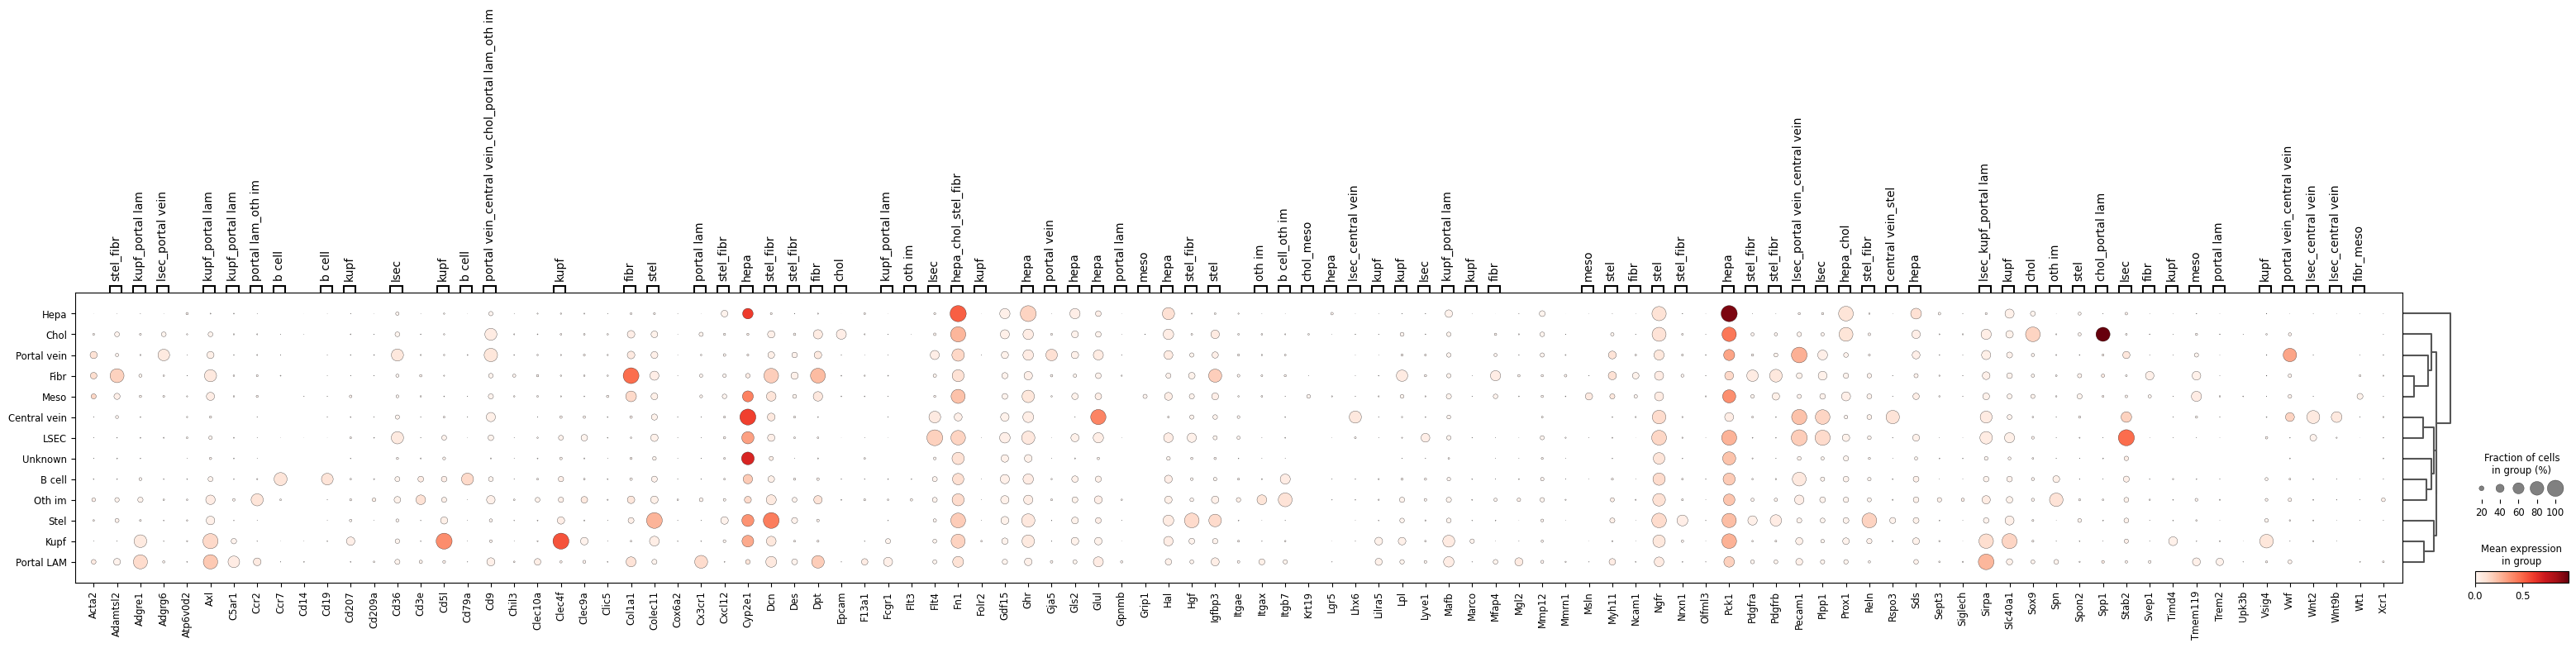

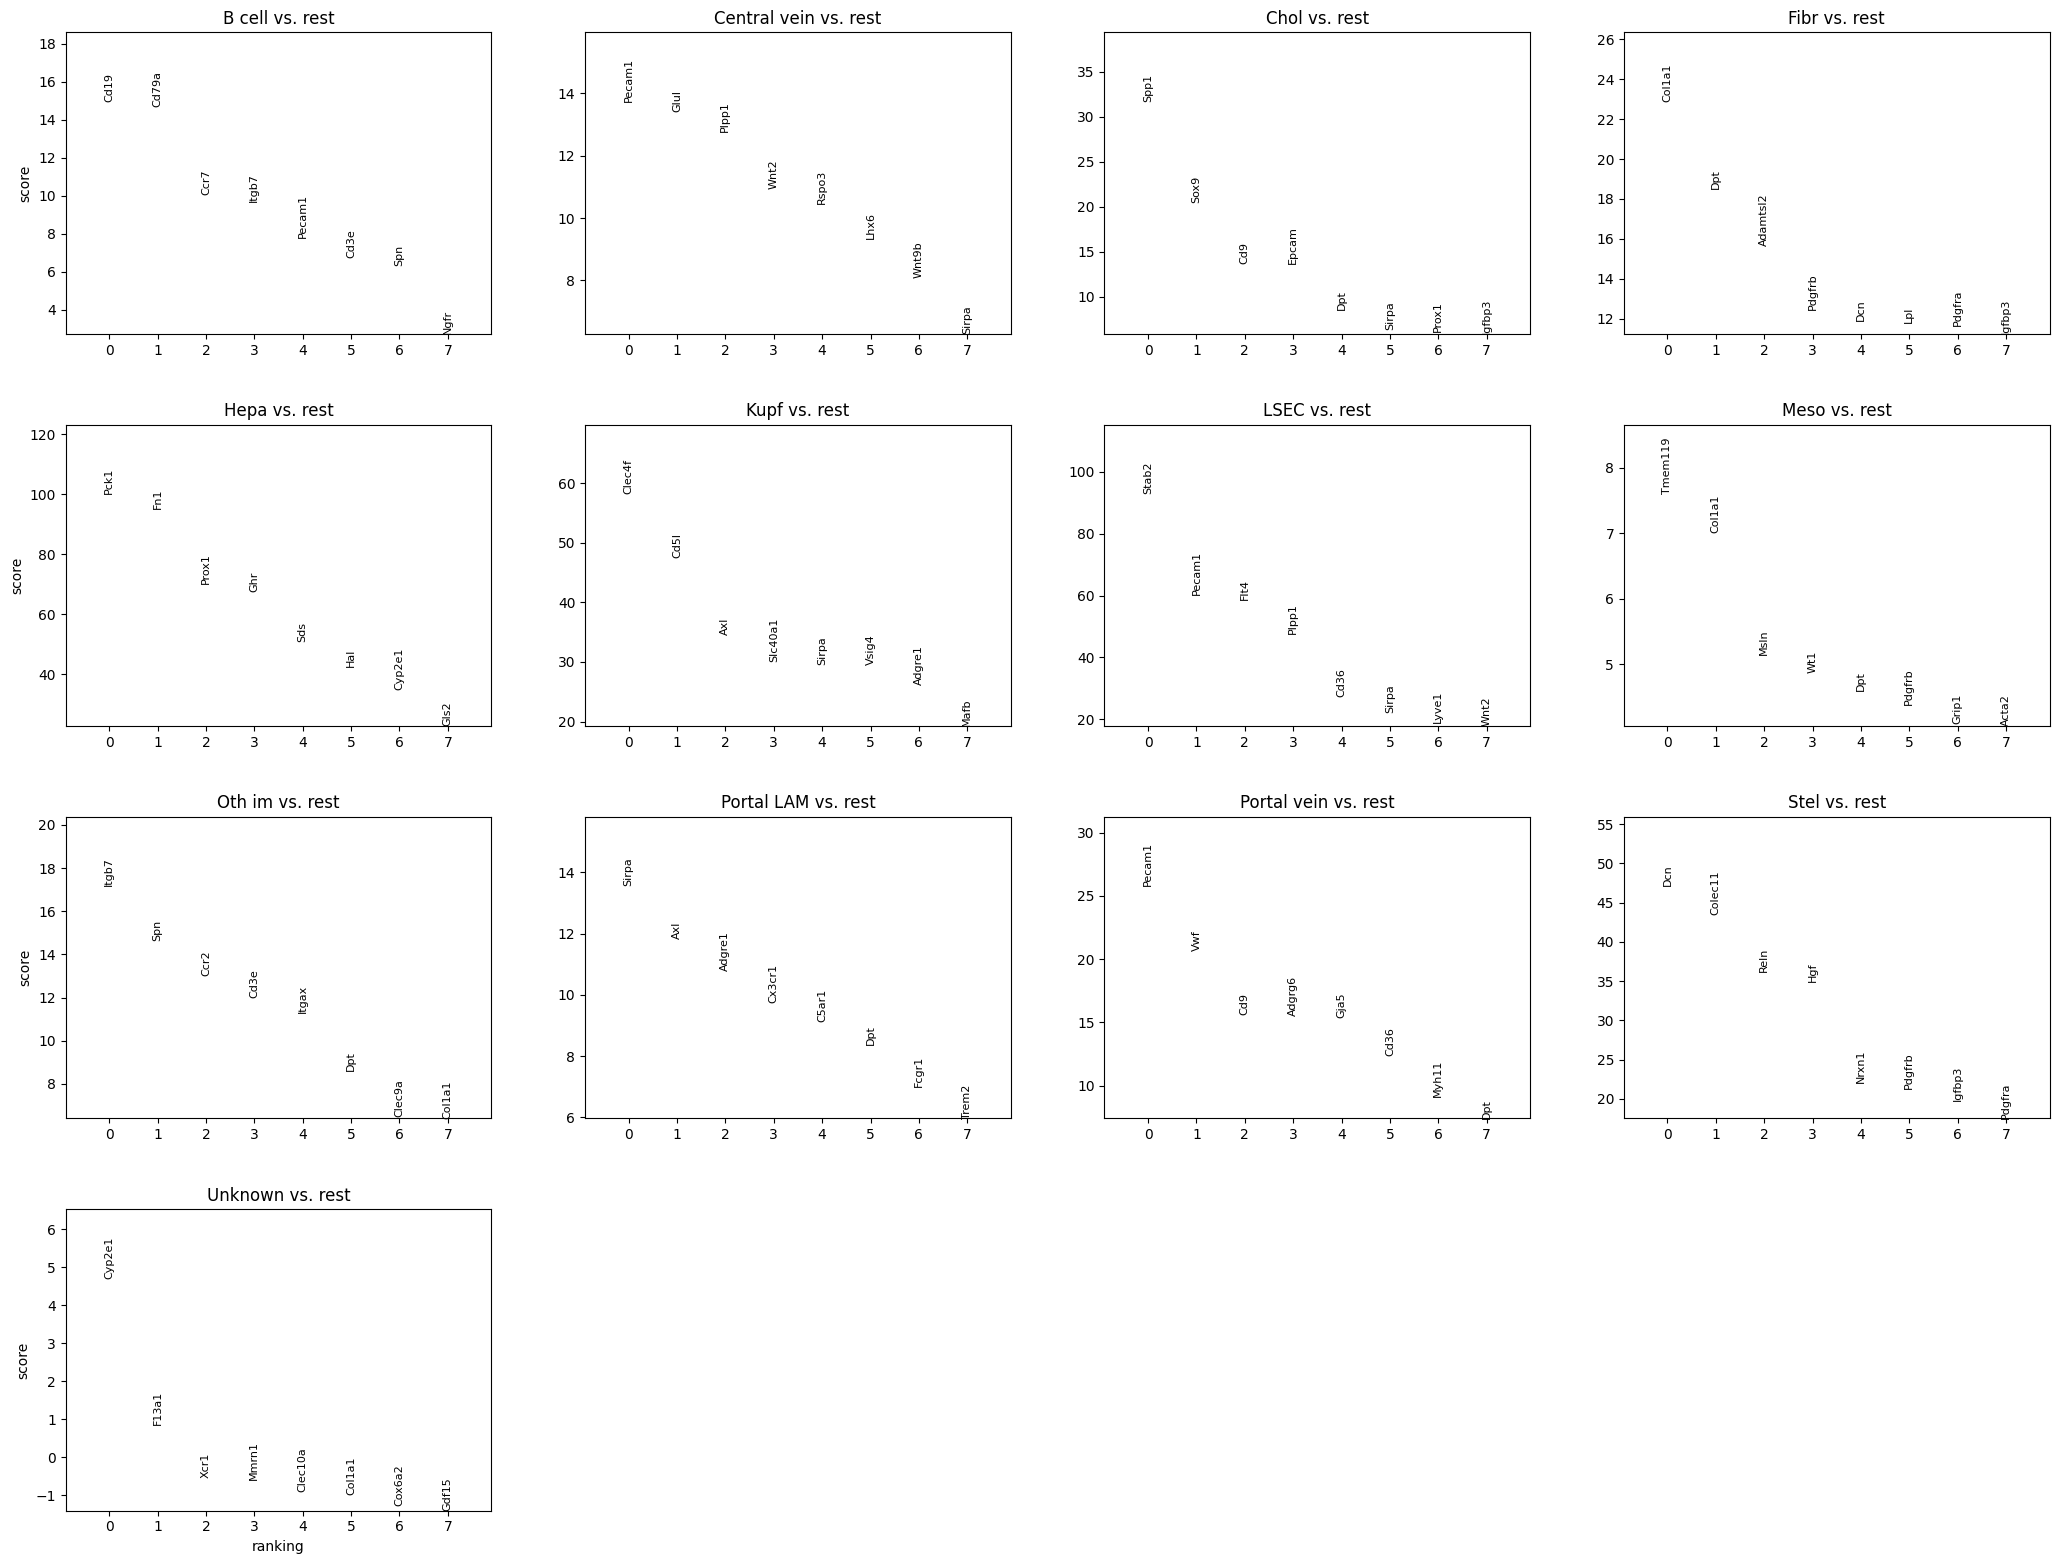

In [10]:
# ANNOTATION AT THE END OF THE ITERATIVE PROCESS
visualize_classification(anndata,'own_score_genes_BasicMartin','umap',path_mg_BasicMartin)

In [11]:
annotations = ['annotation_score_genes_original_Martin','annotation_own_score_genes_start_iterative_Martin','annotation_own_score_genes_Martin']
names_anno_plot = ['original','start score genes','end score genes']
proportions_annotations_Hepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['LSEC','Kupf','Stel','B cell','Chol','Central vein','Fibr','Meso','Oth im','Portal LAM','Portal vein','Unknown'])
proportions_annotations_noHepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['Hepa'])
avg_homog_annotations = compare_annotations_samples_cluster_homogeneity([anndata],[short_name],annotations,names_anno_plot,drop_cell_types=[])
perc_cells_in_unknown_leiden_cl = compare_annotations_samples_cluster_homogeneity_percentage_unknown([anndata],[short_name],annotations,names_anno_plot)
homog_per_ct_annotations = compare_annotations_cluster_homogeneity(anndata,short_name,annotations,names_anno_plot,drop_cell_types=[])

KeyError: 'annotation_score_genes_original_Martin'

In [ ]:
# PART 2
# Start from the iterative score genes annotation of part 1 to assign cell types to leiden clusters
# Apply two strategies to change the marker gene list
# Do the original and new score genes again with the new marker gene list

In [ ]:
cell_types = anndata.obs['annotation_own_score_genes_Martin'].unique().tolist()  
leiden_clusters_per_ct = clusteringVSleiden(anndata,"annotation_own_score_genes_Martin", "leiden",cell_types=cell_types,print_results=False)

In [ ]:
a = anndata.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x[0]) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
anndata.obs['leiden_cell_types'] = a
print(anndata.obs['leiden_cell_types'].value_counts())

Hepa            7029
LSEC            1388
Kupf             723
Stel             649
Fibr             322
Oth im           265
Chol             241
Portal vein      200
Unknown          159
B cell           148
Portal LAM        93
Central vein      66
Name: leiden_cell_types, dtype: int64


In [ ]:
# get index of 'Unknown' in cell_types
idx = cell_types.index('Unknown')
leiden_clusters_per_ct.pop(idx)

[(100, 0.44, 59), (102, 0.45, 58), (108, 0.21, 42)]

66 cells randomly sampled from each cell type in every iteration to do the DEG analysis
Summary:
Central vein
Maybe drop:[['Pecam1', 'LSEC'], ['Plpp1', 'Portal vein'], ['Plpp1', 'Kupf'], ['Pecam1', 'Kupf'], ['Rspo3', 'Fibr'], ['Plpp1', 'Fibr'], ['Plpp1', 'Meso'], ['Cd9', 'Portal LAM']]
LSEC
Maybe drop:[['Lyve1', 'Kupf'], ['Plpp1', 'Kupf'], ['Pecam1', 'Kupf'], ['Stab2', 'Kupf'], ['Plpp1', 'Fibr']]
Kupf
Maybe drop:[['Slc40a1', 'LSEC'], ['Sirpa', 'LSEC']]
Stel
Maybe drop:[['Slc40a1', 'LSEC'], ['Plpp1', 'Portal vein'], ['Plpp1', 'Kupf'], ['Rspo3', 'Fibr'], ['Plpp1', 'Fibr'], ['Plpp1', 'Meso']]
Portal LAM
Maybe drop:[['Sirpa', 'LSEC']]
Portal vein
Maybe drop:[['Plpp1', 'Kupf'], ['Pecam1', 'Kupf'], ['Plpp1', 'Fibr'], ['Cd9', 'Portal LAM']]
Fibr
Maybe drop:[['Fn1', 'Chol'], ['Fn1', 'Stel']]
Chol
Maybe drop:[['Cd9', 'Portal LAM'], ['Spp1', 'Portal LAM']]
B cell
Maybe drop:[['Pecam1', 'Kupf'], ['Itgb7', 'Oth im']]
Meso
Maybe drop:[['Plpp1', 'Kupf'], ['Plpp1', 'Fibr']]
Summary:
LSEC
Maybe drop:[

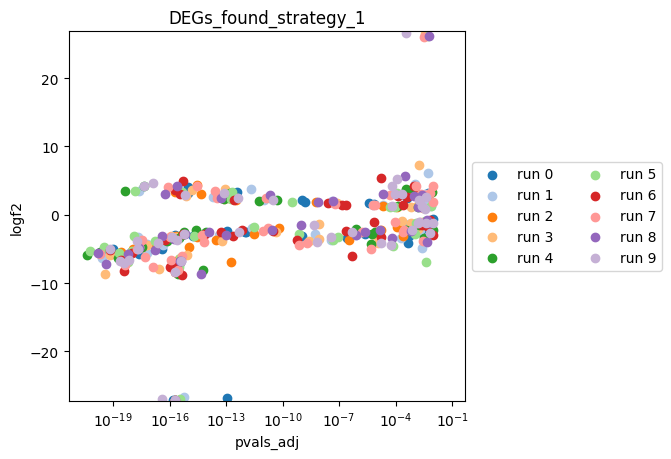

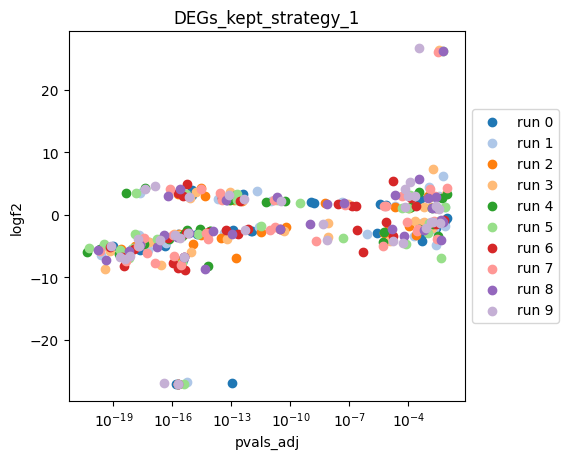

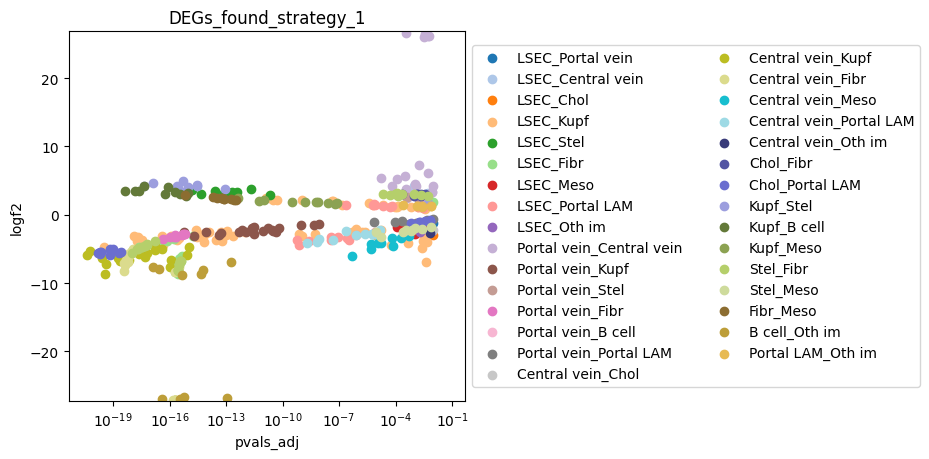

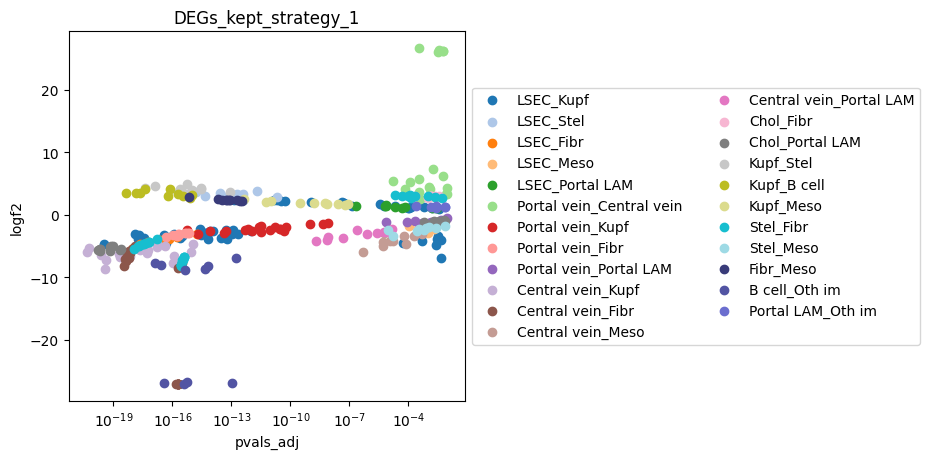

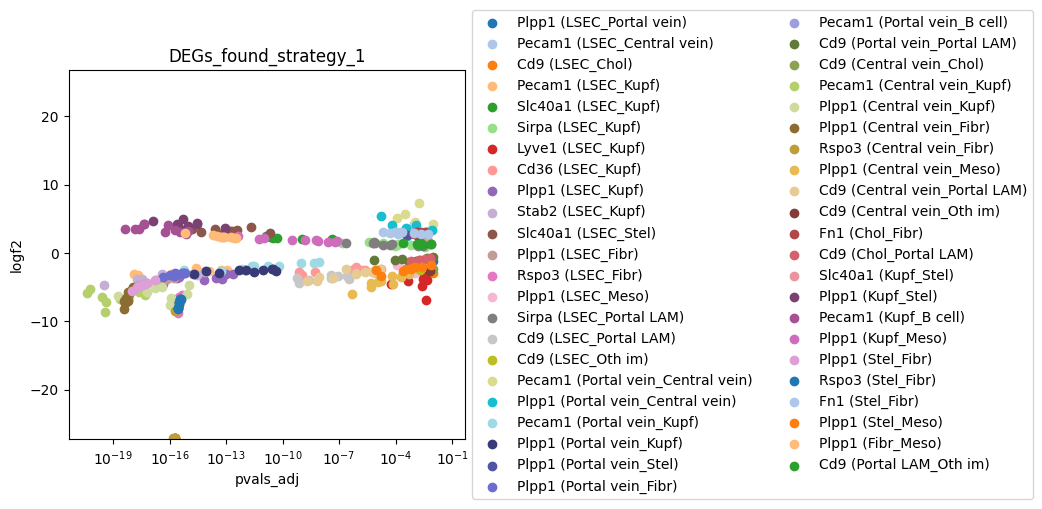

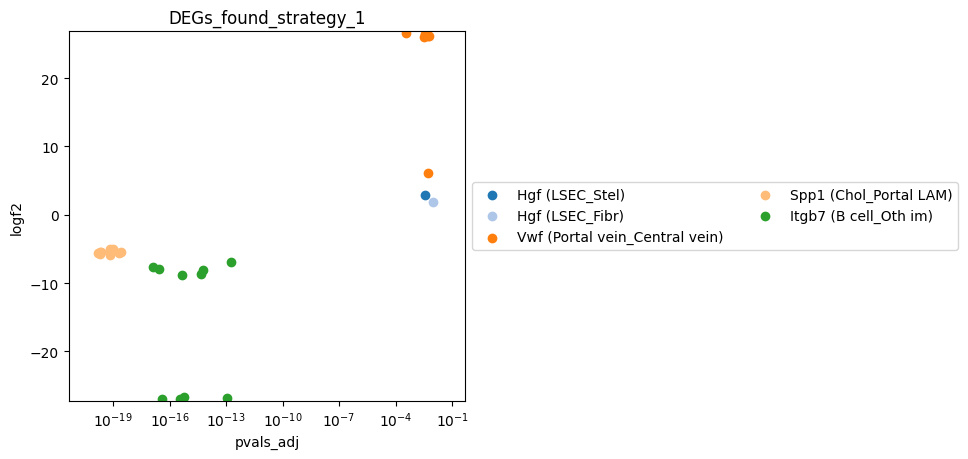

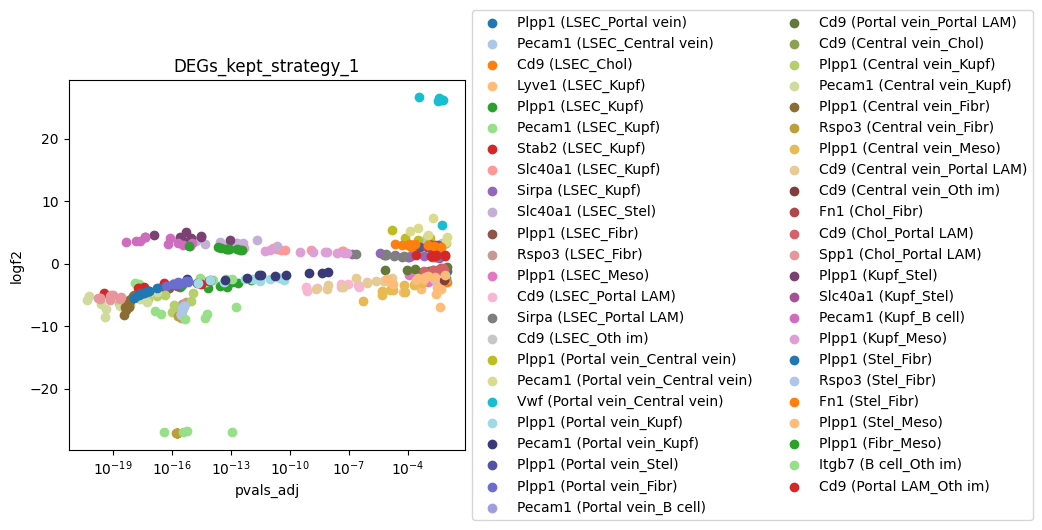

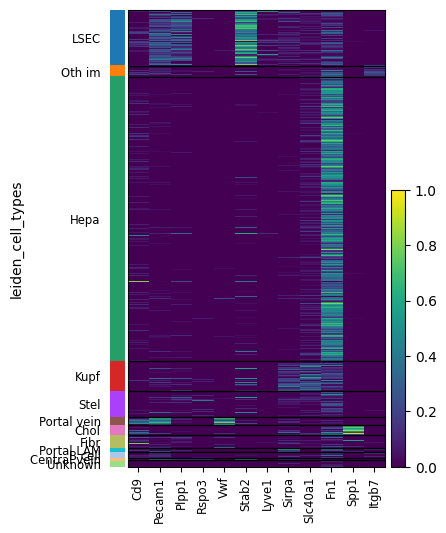

In [ ]:
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(anndata,leiden_clusters_per_ct,path_mg_Martin,10,1,OUTPUT_DIR)

66 cells randomly sampled from each cell type in every iteration to do the DEG analysis
['6', '31', '2', '59', '0', '82', '92', '8', '10', '25', '1']
Acta2
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal vein']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Portal vein']
Adgre1
Is marker gene of: ['Kupf', 'Portal LAM']
Could also be a marker gene of: ['LSEC', 'Chol']
Adgrg6
Is marker gene of: ['LSEC', 'Portal vein', 'Chol', 'Fibr']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf', 'Stel', 'Fibr', 'Portal LAM']
Could also be a marker gene of: ['LSEC', 'Portal vein', 'Chol']
C5ar1
Is marker gene of: ['Kupf', 'Portal LAM']
Could also be a marker gene of: ['Chol']
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Chol', 'Oth im']
Ccr7
Is marker gene of: ['B cell']
Could also be a marker gene of: ['Stel']
Cd19
Is marker gene of: ['B cell']
Could also be a marker gene of: ['Stel']
Cd207
Is mark

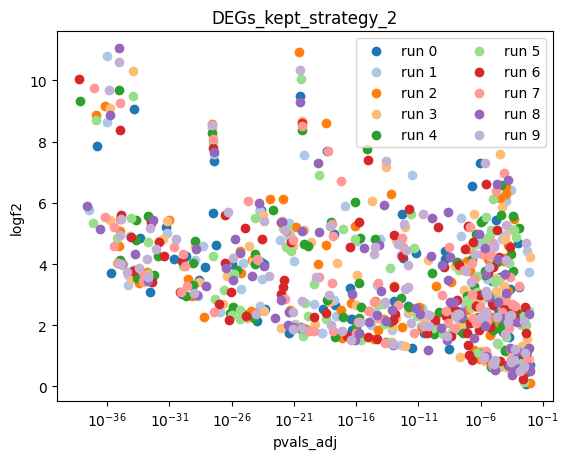

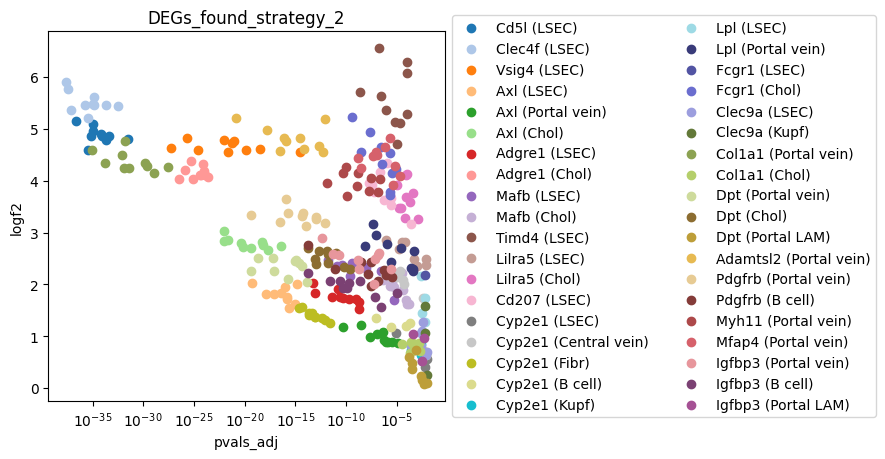

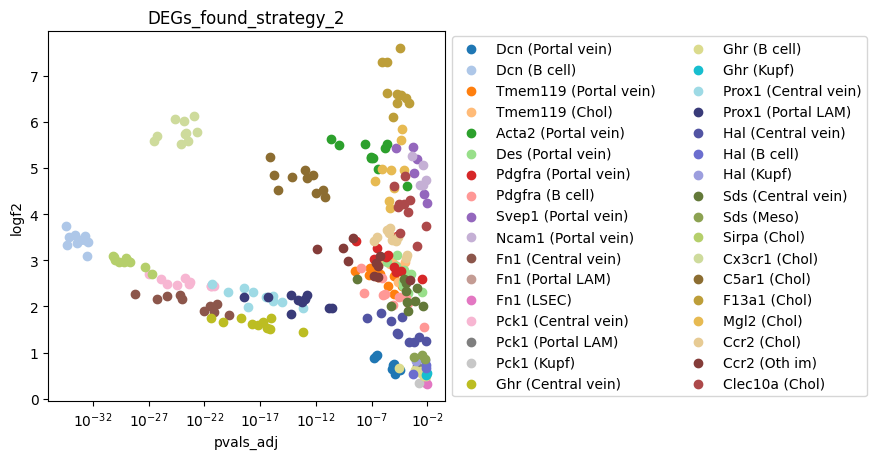

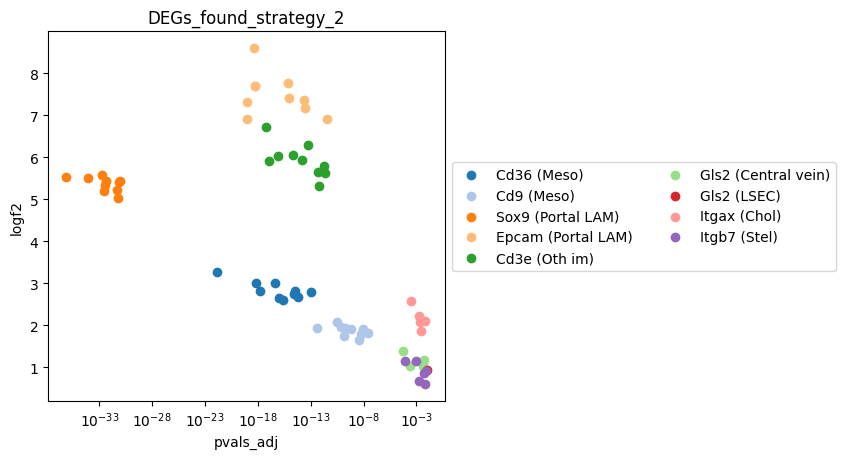

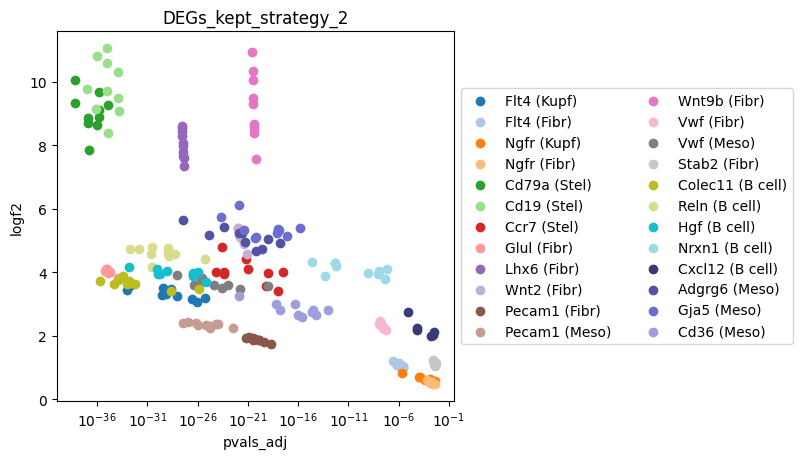

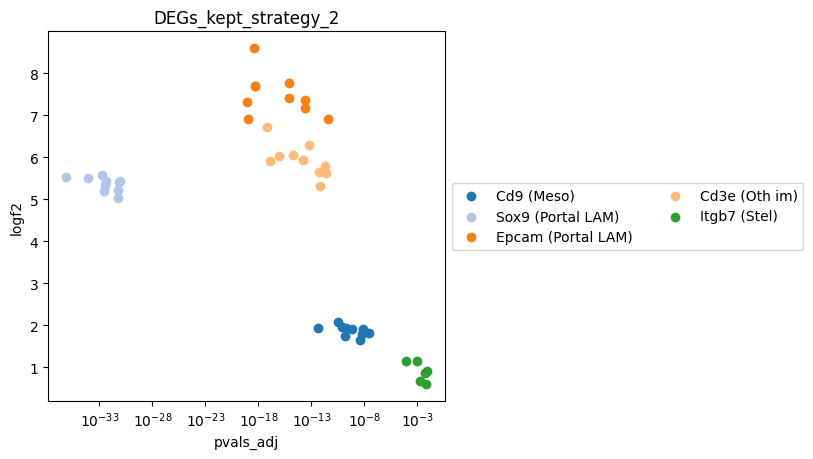

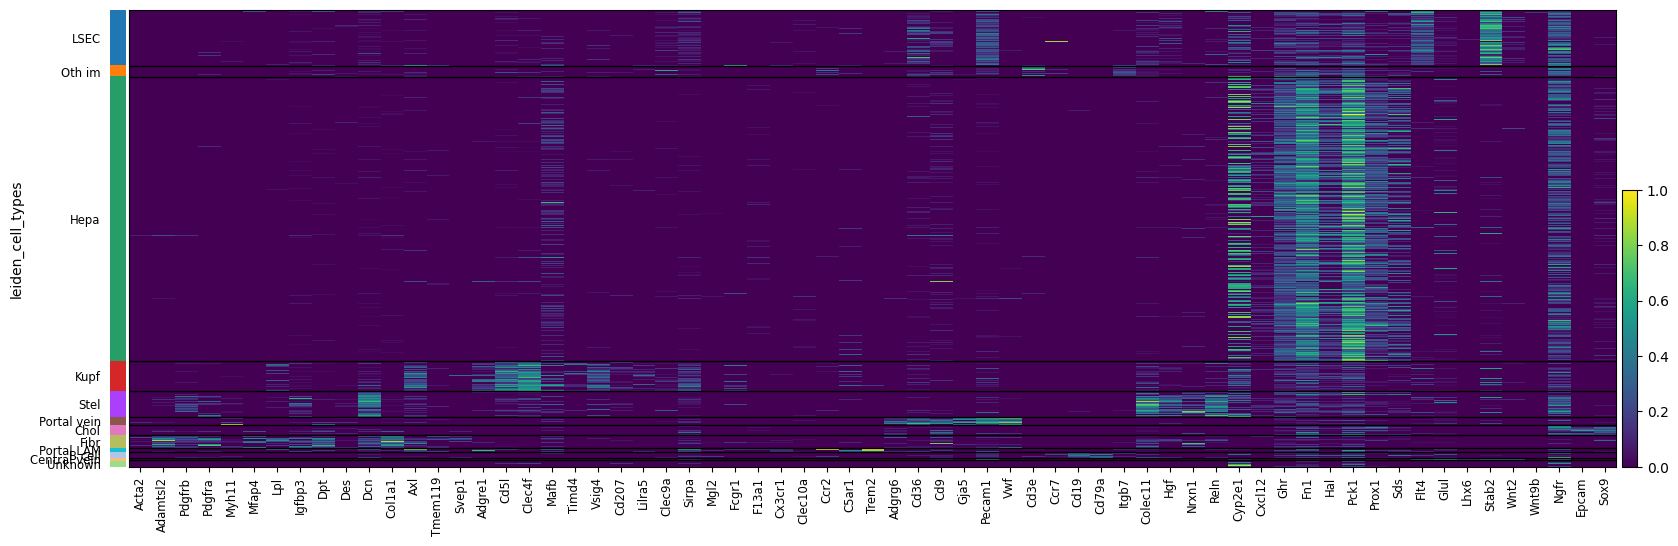

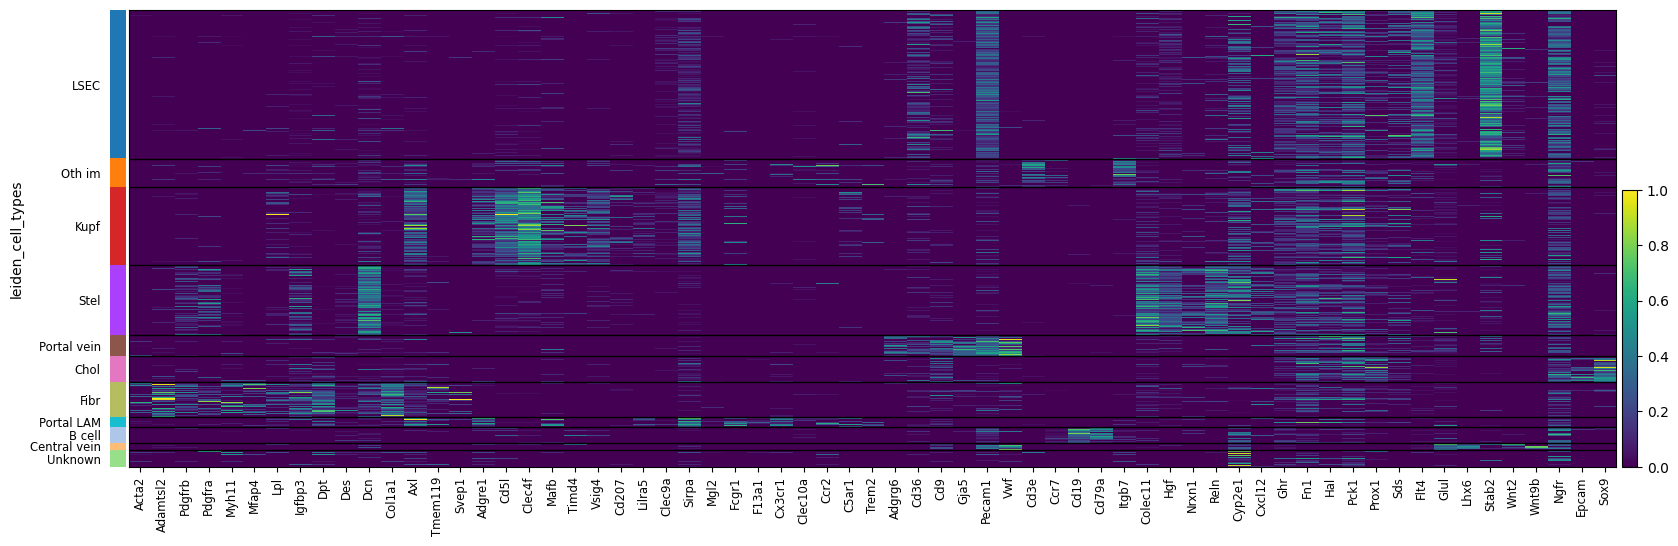

In [ ]:
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(anndata,leiden_clusters_per_ct,path_mg_Martin,10,2,OUTPUT_DIR)

Hepa             8.669
LSEC            15.333
Portal vein     18.500
Central vein    11.000
Chol            21.500
Kupf            19.500
Stel            18.334
Fibr            26.625
B cell          14.000
Meso            11.500
Portal LAM      16.500
Oth im           5.000
dtype: float64


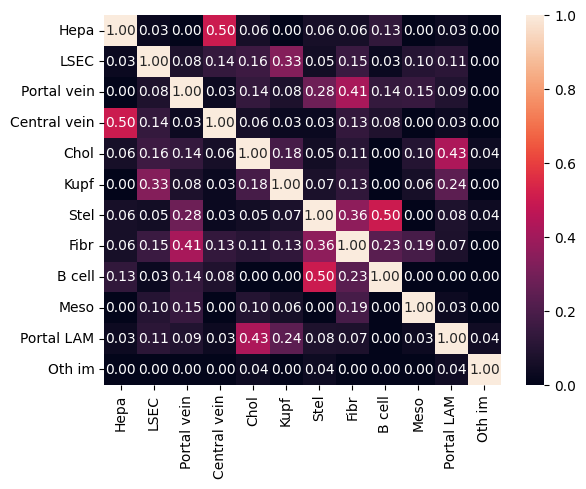

In [ ]:
# CHANGE MARKER GENE LIST BASED ON STRATEGY 1 AND STRATEGY 2:
df_mg = pd.read_csv(path_mg_Martin,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
path_mg_strat_1_2 = OUTPUT_DIR + "/markers_strat_1_2.csv"
df_mg.to_csv(path_mg_strat_1_2)
Jaccard_similarity_matrix(path_mg_strat_1_2)

Cell type proportions:
              annotation_score_genes_original_Martin_strat_1_2
B cell                                                5.858371
Central vein                                         24.957901
Chol                                                  0.487459
Fibr                                                  0.354516
Hepa                                                 49.782859
Kupf                                                  5.698839
LSEC                                                  4.121244
Meso                                                  1.435788
Oth im                                                2.065054
Portal LAM                                            1.940973
Portal vein                                           2.924754
Stel                                                  0.372241


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
Central vein
[

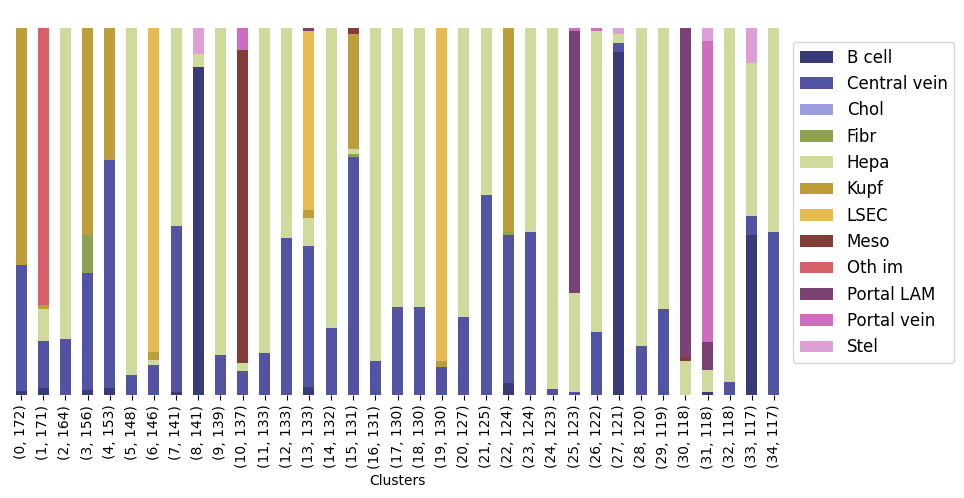

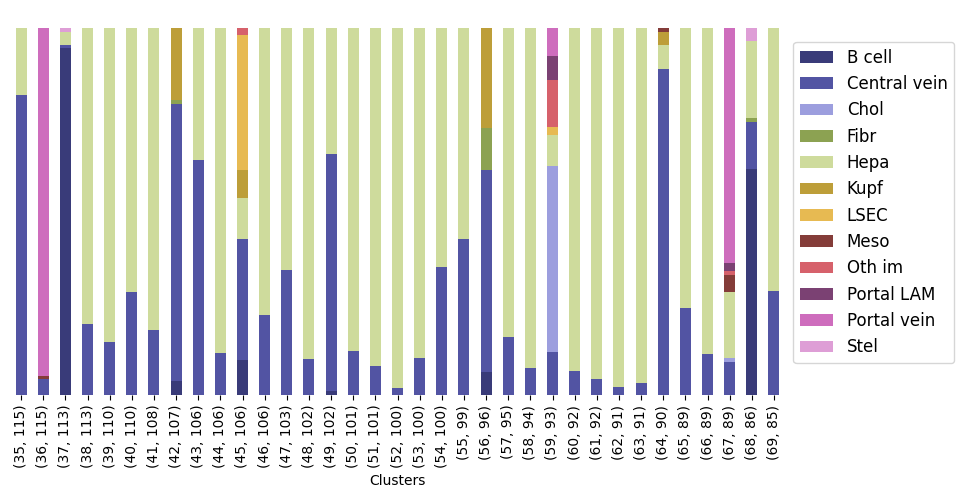

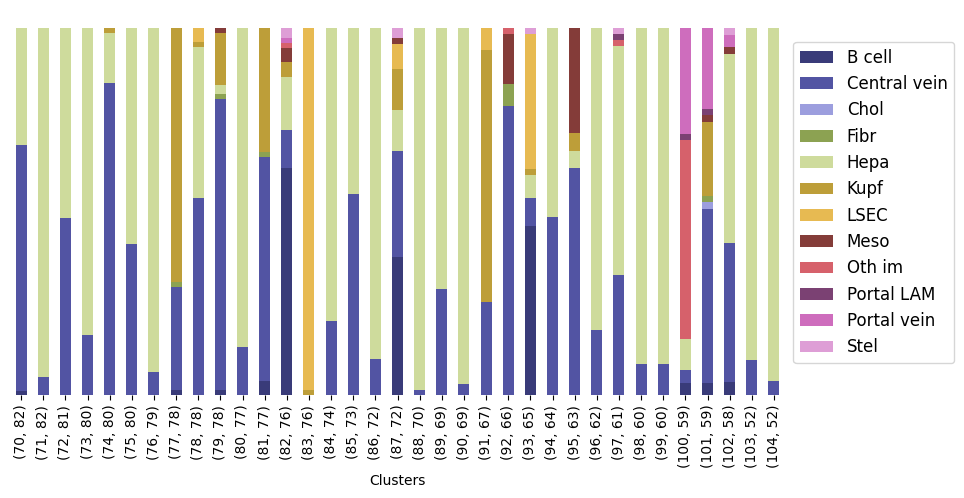

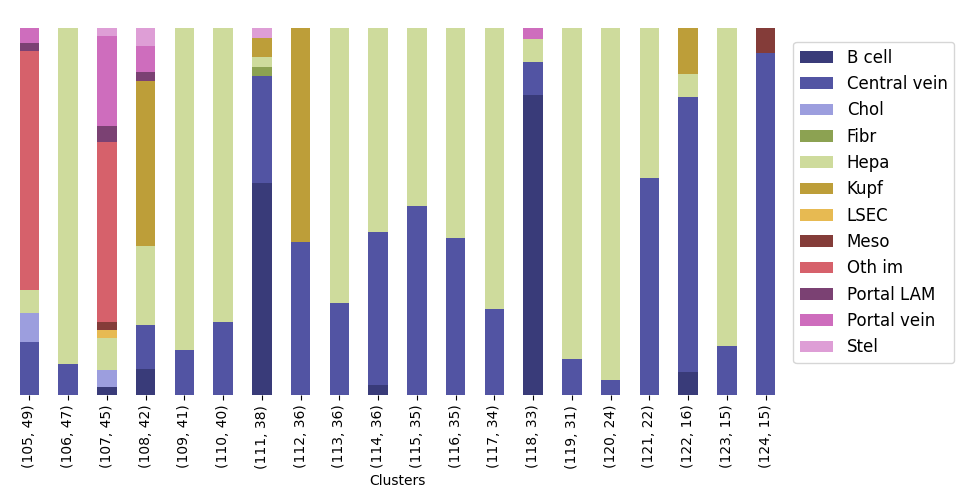

Fraction of cells in a Leiden cluster with unknown cell type:
5.663
Average cluster homogeneity:
0.751
Average cluster homogeneity per cell_type:
B cell: 0.773
Central vein: 0.682
Chol: 0.51
Fibr: nan
Hepa: 0.811
Kupf: 0.622
LSEC: 0.927
Meso: 0.85
Oth im: 0.647
Portal LAM: 0.81
Portal vein: 0.803
Stel: nan
Unknown: 0.444


Correlation between cell type scores:


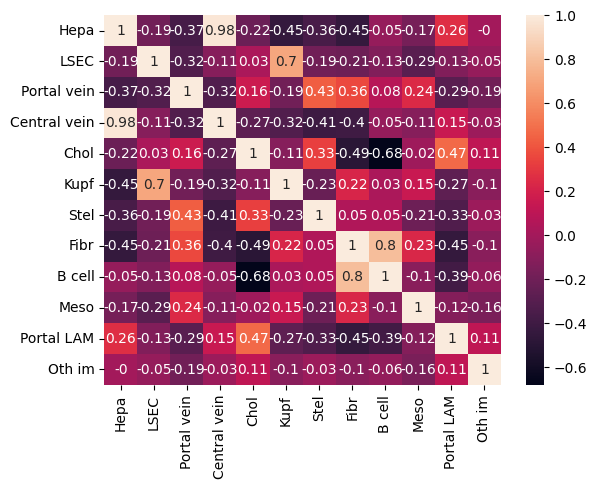

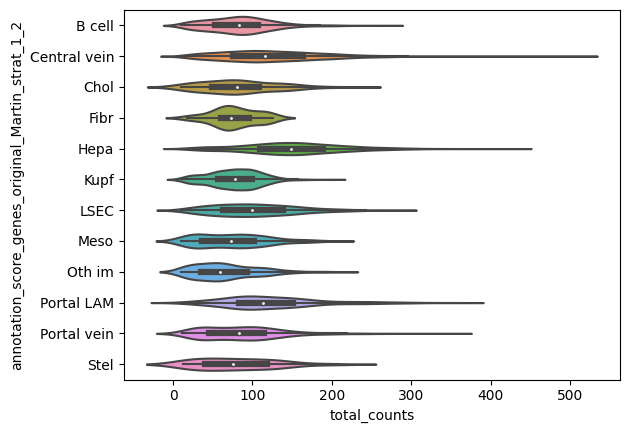

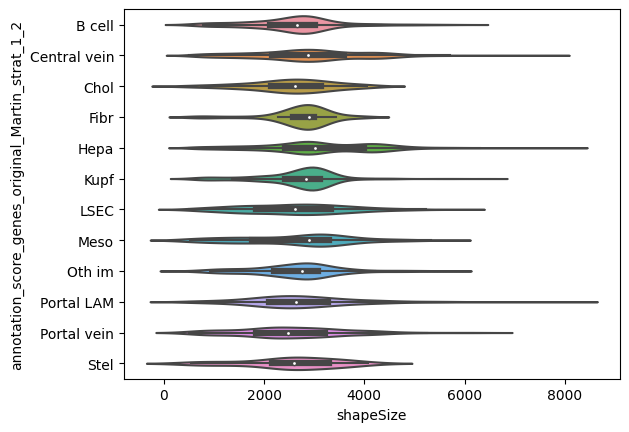

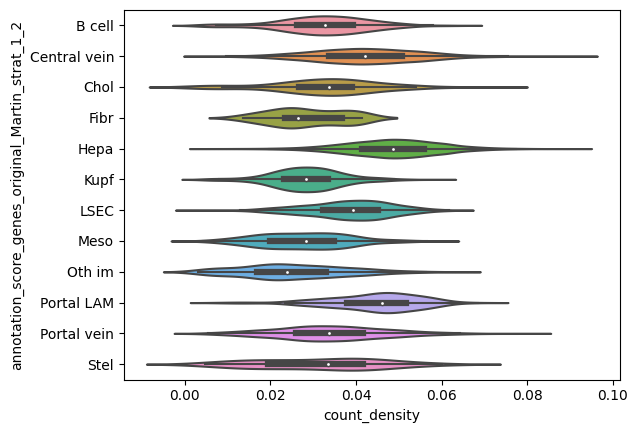

In [ ]:
# ORIGINAL SCORE GENES WITH MODIFIED MARKER GENE LIST
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_strat_1_2,
    bins = 25,
    suffix = '_Martin_strat_1_2'
    )
visualize_classification(anndata,'score_genes_original_Martin_strat_1_2','umap_15',path_mg_strat_1_2,plot_dot_plot=False,plot_rank_genes_groups=False)

Hepa            65.939910
Fibr             7.223256
B cell           5.362049
Kupf             3.988301
LSEC             2.720908
Stel             2.667730
Meso             2.650004
Central vein     2.623416
Portal LAM       2.348666
Oth im           2.011876
Portal vein      1.985288
Chol             0.319064
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64


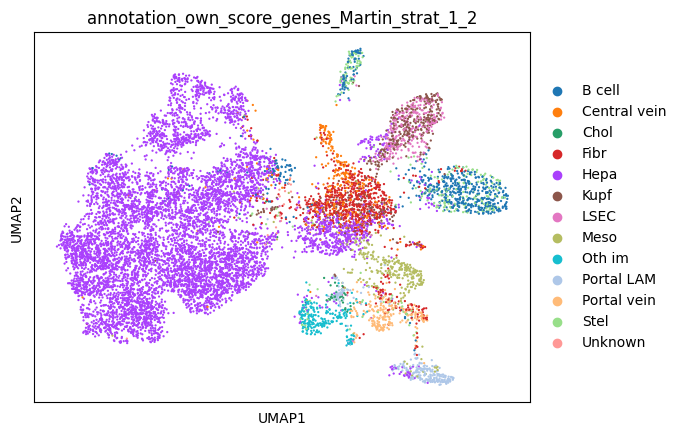

Percentage of cells with changed annotation: 25.63


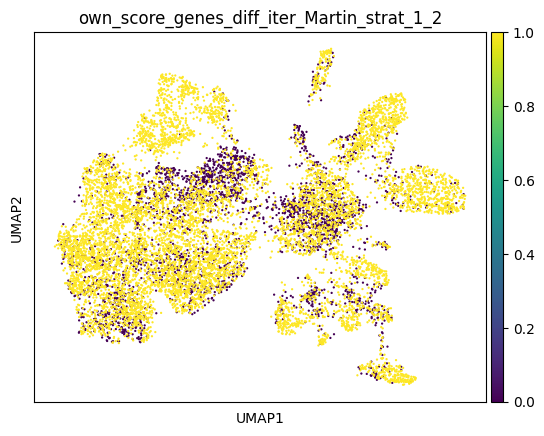

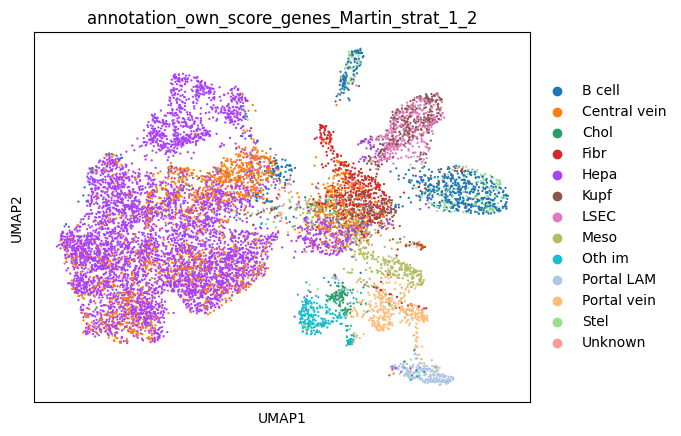

Hepa            48.063458
Central vein    17.965080
B cell           6.531951
Meso             4.688469
Kupf             4.564389
Fibr             4.209873
LSEC             3.403350
Portal vein      3.137463
Oth im           2.268900
Portal LAM       2.091642
Stel             1.923247
Chol             0.992644
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64
Percentage of cells with changed annotation: 9.44


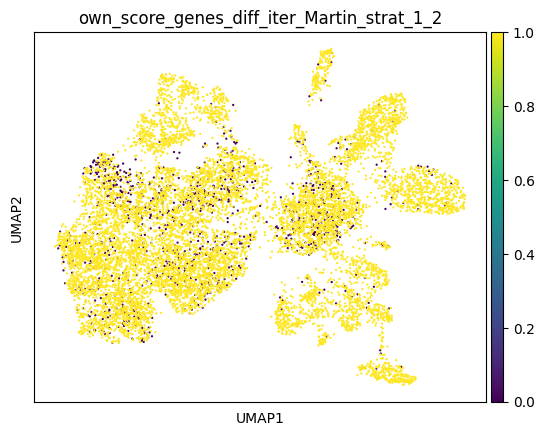

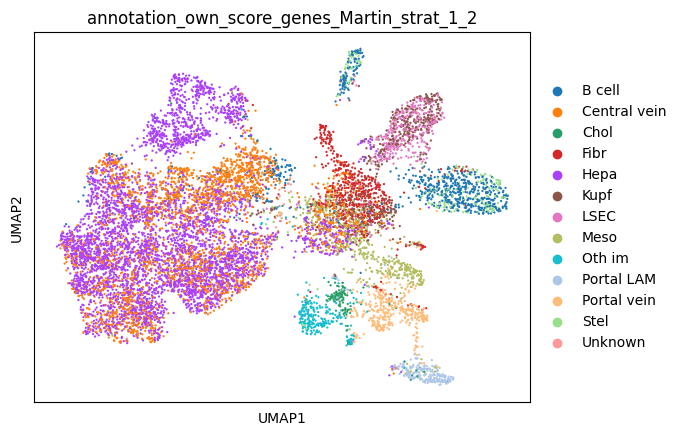

Hepa            40.503412
Central vein    23.823451
B cell           6.266064
Fibr             5.149340
Meso             5.087299
Kupf             4.777098
LSEC             3.598334
Portal vein      3.305858
Oth im           2.251174
Portal LAM       2.038465
Stel             1.985288
Chol             1.054684
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64
Percentage of cells with changed annotation: 3.07


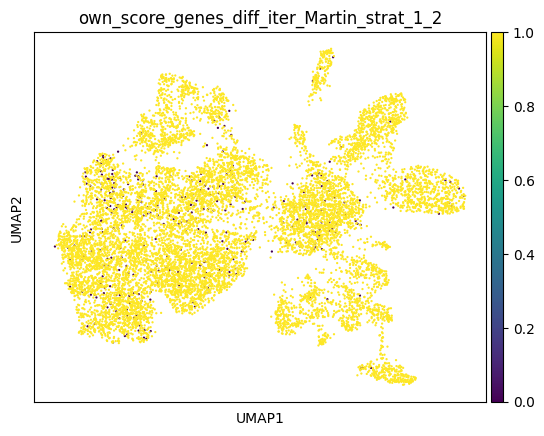

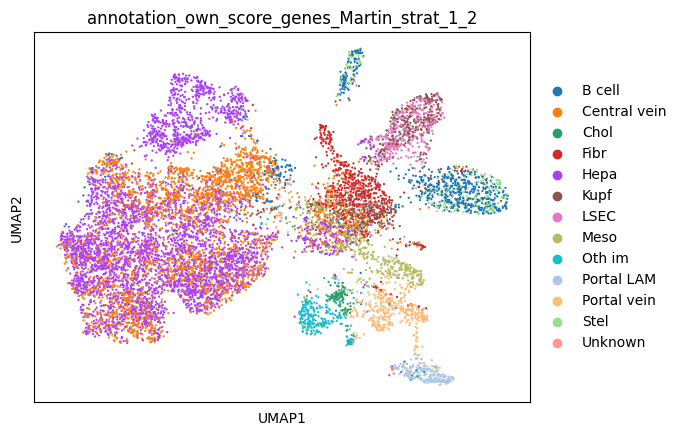

Hepa            37.968625
Central vein    25.959408
B cell           6.168572
Fibr             5.415226
Meso             5.105025
Kupf             4.856864
LSEC             3.616060
Portal vein      3.332447
Oth im           2.233449
Portal LAM       2.056191
Stel             2.047328
Chol             1.081273
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64
Percentage of cells with changed annotation: 0.96


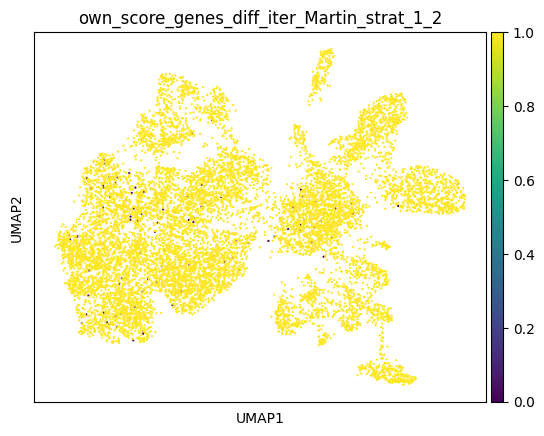

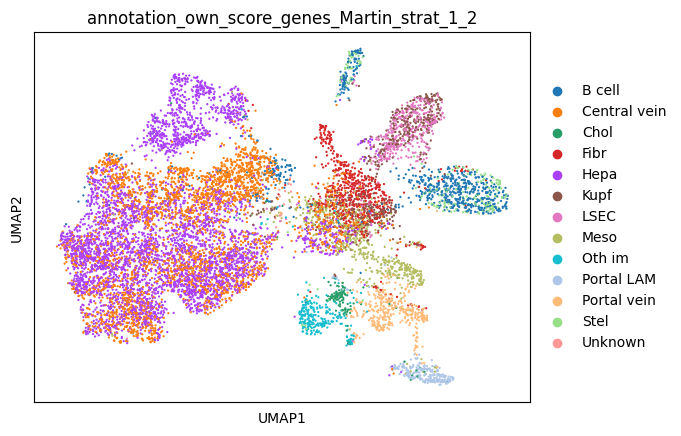

Hepa            37.144376
Central vein    26.677302
B cell           6.133121
Fibr             5.486130
Meso             5.105025
Kupf             4.883453
LSEC             3.633785
Portal vein      3.341310
Oth im           2.233449
Portal LAM       2.065054
Stel             2.056191
Chol             1.081273
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64
Percentage of cells with changed annotation: 0.2


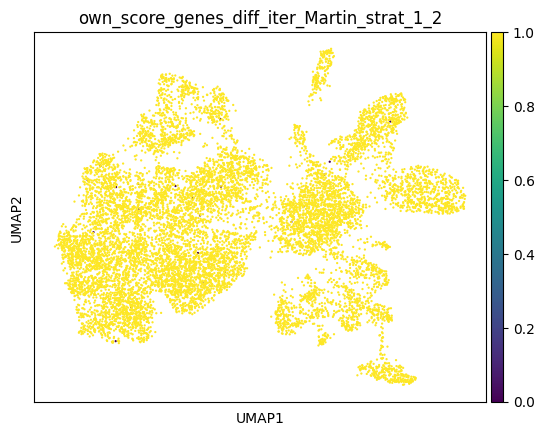

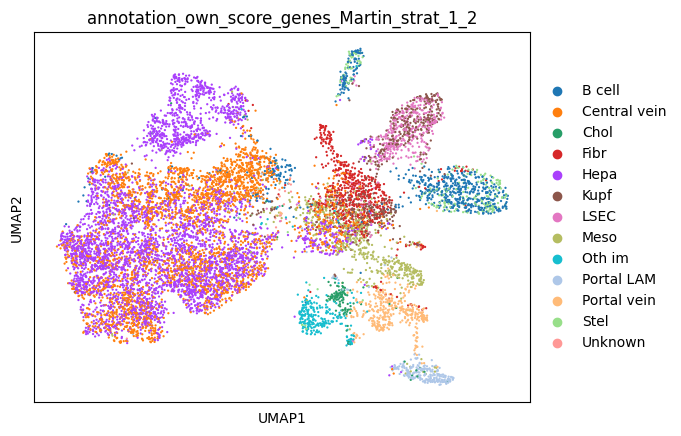

Hepa            37.002570
Central vein    26.792520
B cell           6.124258
Fibr             5.486130
Meso             5.105025
Kupf             4.927767
LSEC             3.624922
Portal vein      3.341310
Oth im           2.233449
Portal LAM       2.065054
Stel             2.056191
Chol             1.081273
Unknown          0.159532
Name: annotation_own_score_genes_Martin_strat_1_2, dtype: float64
Percentage of cells with changed annotation: 0.01
converged


In [ ]:
# NEW SCORE GENES WITH MODIFIED MARKER GENE LIST
scores = own_score_genes_iterative(anndata,path_mg_strat_1_2,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Martin_strat_1_2')

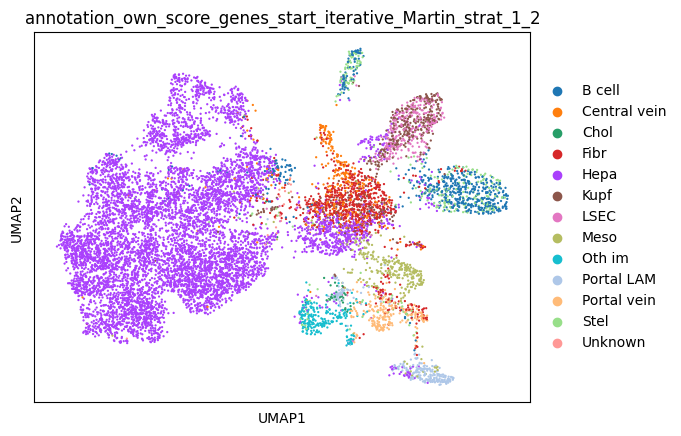

Cell type proportions:
              annotation_own_score_genes_start_iterative_Martin_strat_1_2
B cell                                                 5.362049          
Central vein                                           2.623416          
Chol                                                   0.319064          
Fibr                                                   7.223256          
Hepa                                                  65.939910          
Kupf                                                   3.988301          
LSEC                                                   2.720908          
Meso                                                   2.650004          
Oth im                                                 2.011876          
Portal LAM                                             2.348666          
Portal vein                                            1.985288          
Stel                                                   2.667730          
Unknown        

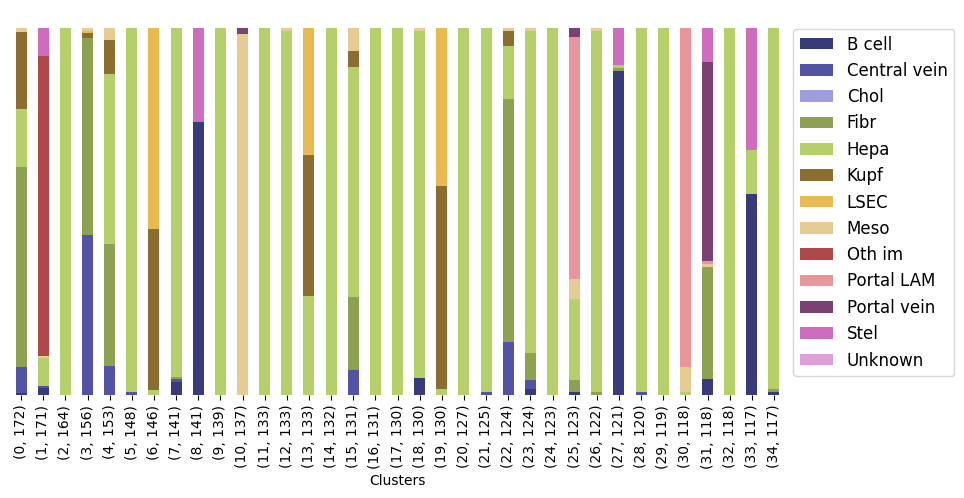

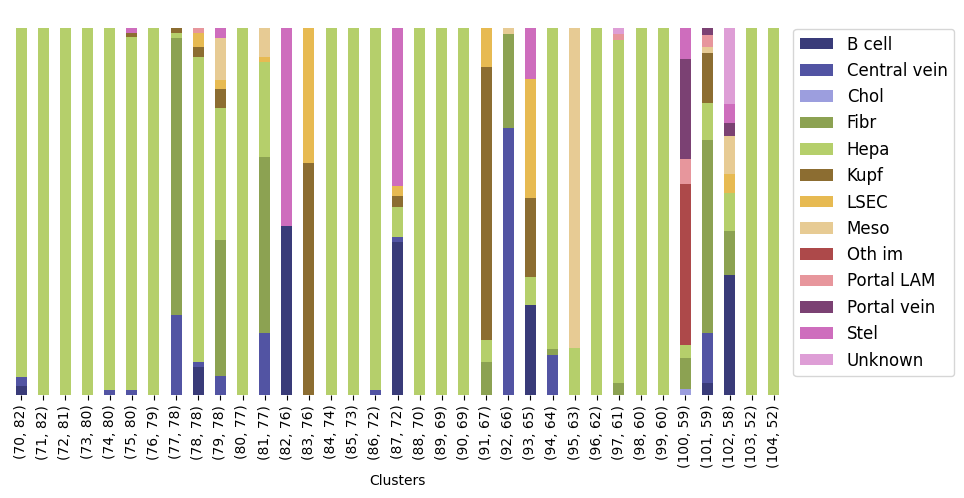

Fraction of cells in a Leiden cluster with unknown cell type:
10.432
Average cluster homogeneity:
0.838
Average cluster homogeneity per cell_type:
B cell: 0.674
Central vein: 0.73
Chol: nan
Fibr: 0.625
Hepa: 0.971
Kupf: 0.62
LSEC: 0.55
Meso: 0.93
Oth im: 0.67
Portal LAM: 0.717
Portal vein: 0.71
Stel: 0.53
Unknown: 0.406


Correlation between cell type scores:


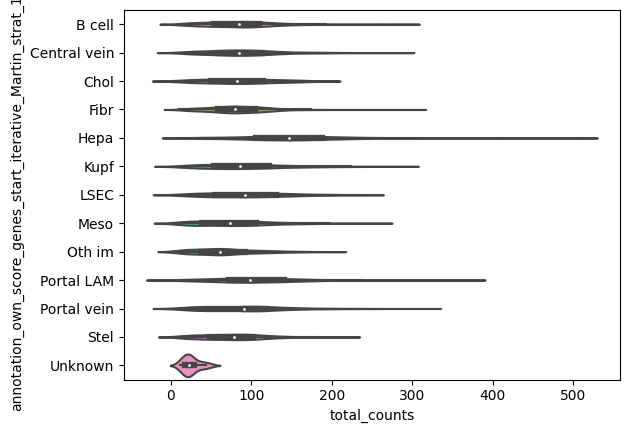

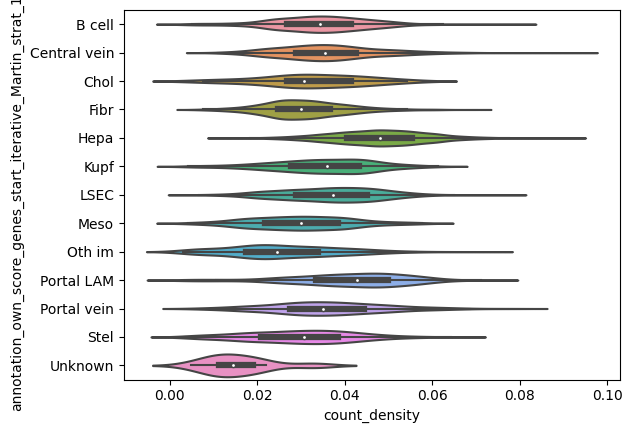

In [ ]:
# ANNOTATION AT THE START OF THE ITERATIVE PROCESS WITH MODIFIED MARKER GENE LIST
visualize_classification(anndata,'own_score_genes_start_iterative_Martin_strat_1_2','umap_15',path_mg_strat_1_2,plot_dot_plot=False,plot_rank_genes_groups=False)

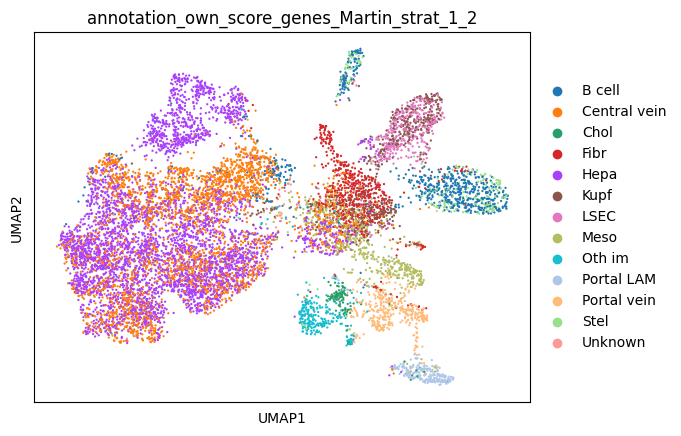

Cell type proportions:
              annotation_own_score_genes_Martin_strat_1_2
B cell                                           6.124258
Central vein                                    26.792520
Chol                                             1.081273
Fibr                                             5.486130
Hepa                                            37.002570
Kupf                                             4.936630
LSEC                                             3.624922
Meso                                             5.096162
Oth im                                           2.233449
Portal LAM                                       2.065054
Portal vein                                      3.341310
Stel                                             2.056191
Unknown                                          0.159532


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
Meso
[(10, 0.88, 137)

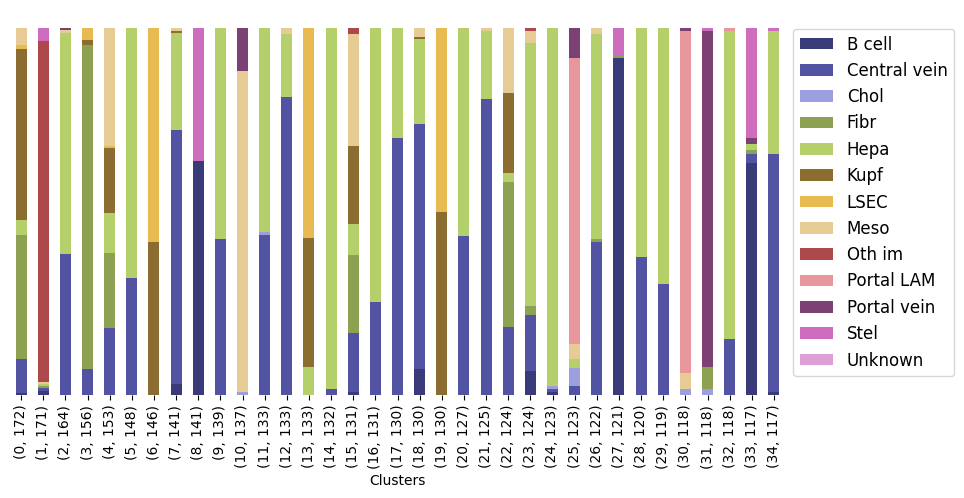

Fraction of cells in a Leiden cluster with unknown cell type:
12.036
Average cluster homogeneity:
0.68
Average cluster homogeneity per cell_type:
B cell: 0.664
Central vein: 0.672
Chol: 0.85
Fibr: 0.832
Hepa: 0.746
Kupf: 0.69
LSEC: 0.565
Meso: 0.823
Oth im: 0.673
Portal LAM: 0.855
Portal vein: 0.78
Stel: nan
Unknown: 0.411


Correlation between cell type scores:


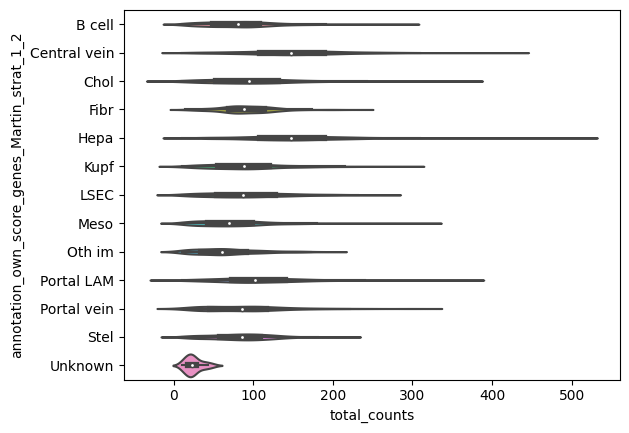

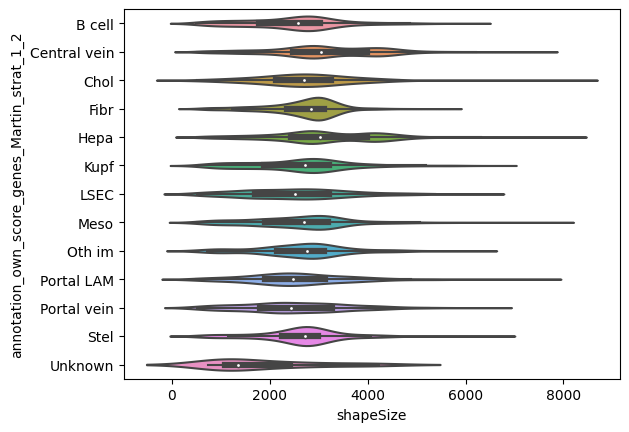

In [ ]:
# ANNOTATION AT THE END OF THE ITERATIVE PROCESS with MODIFIED MARKER GENE LIST
visualize_classification(anndata,'own_score_genes_Martin_strat_1_2','umap_15',path_mg_strat_1_2,plot_dot_plot=False,plot_rank_genes_groups=False)

In [ ]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs',
       'cleanliness_score_genes_original_Martin',
       'annotation_score_genes_original_Martin', 'annotationSave', 'Hep',
       'count_density', 'score_celltype_own_score_g

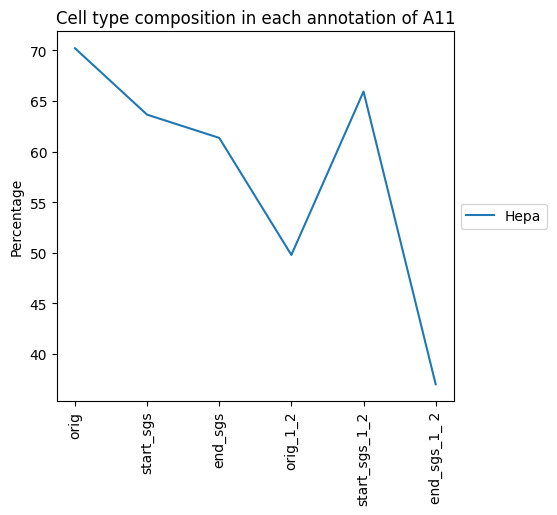

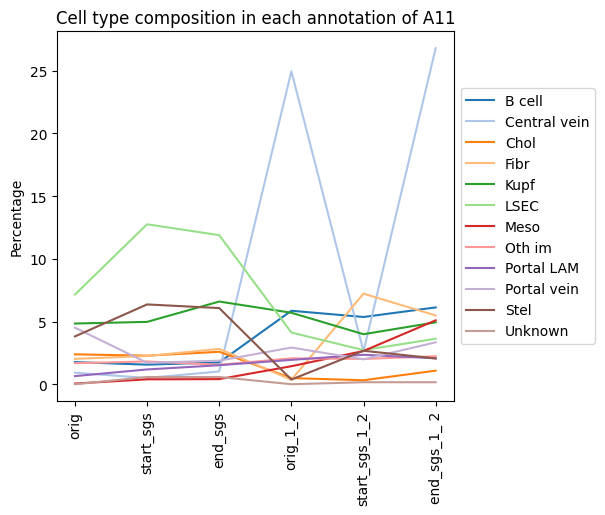

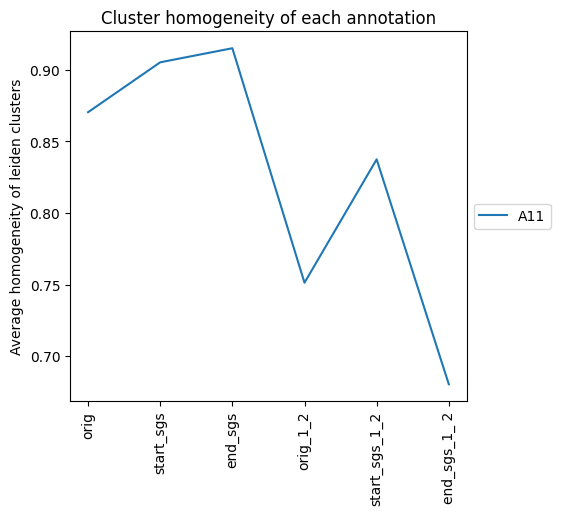

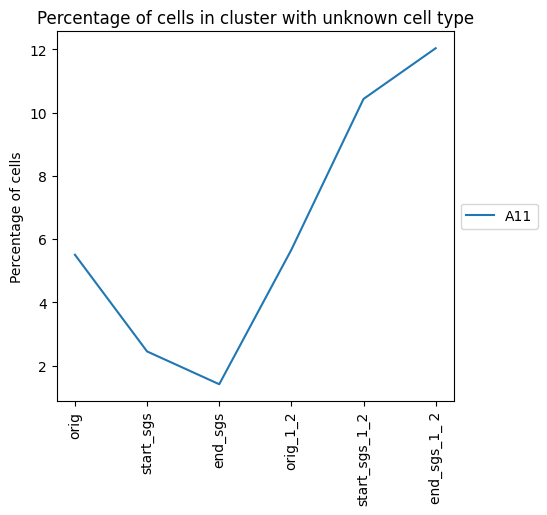

In [ ]:
annotations = ['annotation_score_genes_original_Martin','annotation_own_score_genes_start_iterative_Martin','annotation_own_score_genes_Martin','annotation_score_genes_original_Martin_strat_1_2','annotation_own_score_genes_start_iterative_Martin_strat_1_2','annotation_own_score_genes_Martin_strat_1_2']
names_anno_plot = ['orig','start_sgs','end_sgs','orig_1_2','start_sgs_1_2','end_sgs_1_ 2']
proportions_annotations_Hepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['LSEC','Kupf','Stel','B cell','Chol','Central vein','Fibr','Meso','Oth im','Portal LAM','Portal vein','Unknown'])
proportions_annotations_noHepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['Hepa'])
avg_homog_annotations = compare_annotations_samples_cluster_homogeneity([anndata],[short_name],annotations,names_anno_plot,drop_cell_types=[])
perc_cells_in_unknown_leiden_cl = compare_annotations_samples_cluster_homogeneity_percentage_unknown([anndata],[short_name],annotations,names_anno_plot)
homog_per_ct_annotations = compare_annotations_cluster_homogeneity(anndata,short_name,annotations,names_anno_plot,drop_cell_types=[])

In [ ]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs',
       'cleanliness_score_genes_original_Martin',
       'annotation_score_genes_original_Martin', 'annotationSave', 'Hep',
       'count_density', 'score_celltype_own_score_g

In [ ]:
anndata.uns.keys()

dict_keys(['annotation_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatialdata_attrs', 'umap', 'umap_15', 'score_genes_original_Martin', 'annotation_score_genes_original_Martin_colors', 'own_score_genes_Martin', 'annotation_own_score_genes_Martin_colors', 'own_score_genes_start_iterative_Martin', 'annotation_own_score_genes_start_iterative_Martin_colors', 'leiden_cell_types_colors', 'score_genes_original_Martin_strat_1_2', 'annotation_score_genes_original_Martin_strat_1_2_colors', 'own_score_genes_Martin_strat_1_2', 'annotation_own_score_genes_Martin_strat_1_2_colors', 'own_score_genes_start_iterative_Martin_strat_1_2', 'annotation_own_score_genes_start_iterative_Martin_strat_1_2_colors'])

In [ ]:
anndata.write_h5ad(OUTPUT_DIR + '/' + name_anndata + '_score_genes_Martin.h5ad')